<a href="https://colab.research.google.com/github/lazuardi21/Notebook/blob/main/deep_learning_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, Column, Integer, String, DateTime, Float
from sqlalchemy.sql.sqltypes import BOOLEAN, Boolean
import sqlalchemy

In [17]:
!wget --no-check-certificate https://raw.githubusercontent.com/nachi-hebbar/Time-Series-Forecasting-LSTM/main/monthly_milk_production.csv -O /tmp/monthly_milk_production.csv

--2021-07-22 10:49:44--  https://raw.githubusercontent.com/lazuardi21/source_data/main/export_dataframe.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72238 (71K) [text/plain]
Saving to: ‘/tmp/hour_gas_consumption.csv’

/tmp/hour_gas_consu 100%[===================>]  70.54K  --.-KB/s    in 0.004s  

2021-07-22 10:49:45 (15.8 MB/s) - ‘/tmp/hour_gas_consumption.csv’ saved [72238/72238]



In [19]:
df = pd.read_csv('/tmp/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

ValueError: ignored

In [8]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.iloc[0]

NameError: ignored

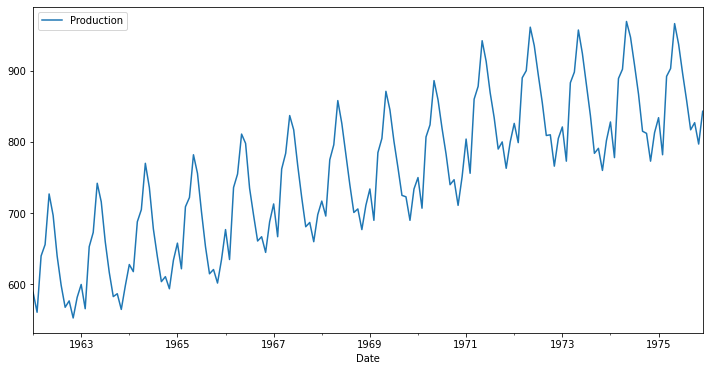

In [9]:
df.plot(figsize=(12,6))

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


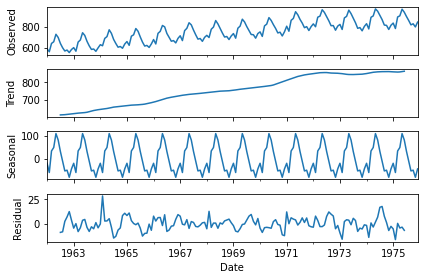

In [12]:
results = seasonal_decompose(df['Production'])
results.plot();

In [13]:
len(df)

168

In [14]:
train = df.iloc[:156]
test = df.iloc[156:]

In [15]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [77]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [78]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [79]:
scaled_train[:100]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [80]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [81]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [82]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [83]:
X.shape

(1, 3, 1)

In [84]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [86]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [88]:
# fit model
model.fit(generator,epochs=100)

Epoch 1/100
144/144 [==============================] - 3s 5ms/step - loss: 0.1193
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0271
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0252
Epoch 4/100
144/144 [==============================] - 1s 6ms/step - loss: 0.0141
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0131
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0103
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 8/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0087
Epoch 9/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0067
Epoch 10/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 11/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0049
Epoch 12/100
144/144 [==============================] - 1s 5ms/step - loss: 0.0041
Epoch 13/100


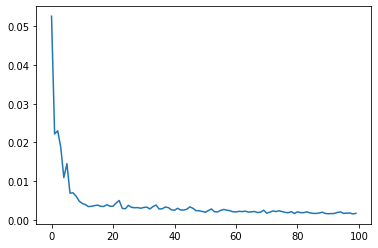

In [89]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [90]:
min(loss_per_epoch)

0.0015494062099605799

In [91]:
last_train_batch = scaled_train[-12:]

In [92]:
len(scaled_train)

156

In [93]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [94]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [95]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [96]:
model.predict(last_train_batch)

array([[0.68078446]], dtype=float32)

In [97]:
a = model.predict(last_train_batch)

In [98]:
type(a)

numpy.ndarray

In [99]:
scaled_test[0]

array([0.67548077])

In [100]:
n_input

12

In [101]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [102]:
test_predictions = []

In [103]:
first_eval_batch = scaled_train[-n_input:]

In [104]:
first_eval_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [105]:
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [106]:
current_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [107]:
for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [108]:
test_predictions

[array([0.68078446], dtype=float32),
 array([0.633296], dtype=float32),
 array([0.83506536], dtype=float32),
 array([0.88379705], dtype=float32),
 array([1.0131302], dtype=float32),
 array([0.96838593], dtype=float32),
 array([0.8970218], dtype=float32),
 array([0.7894447], dtype=float32),
 array([0.6728582], dtype=float32),
 array([0.6407195], dtype=float32),
 array([0.58427453], dtype=float32),
 array([0.6420142], dtype=float32)]

In [109]:
current_batch

array([[[0.68078446],
        [0.63329601],
        [0.83506536],
        [0.88379705],
        [1.01313019],
        [0.96838593],
        [0.89702177],
        [0.78944468],
        [0.67285818],
        [0.64071947],
        [0.58427453],
        [0.64201421]]])

In [110]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [111]:
test_predictions

[array([0.68078446], dtype=float32),
 array([0.633296], dtype=float32),
 array([0.83506536], dtype=float32),
 array([0.88379705], dtype=float32),
 array([1.0131302], dtype=float32),
 array([0.96838593], dtype=float32),
 array([0.8970218], dtype=float32),
 array([0.7894447], dtype=float32),
 array([0.6728582], dtype=float32),
 array([0.6407195], dtype=float32),
 array([0.58427453], dtype=float32),
 array([0.6420142], dtype=float32)]

In [112]:
type(test_predictions)

list

In [113]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [114]:
c = scaler.inverse_transform(test_predictions)

In [115]:
c

array([[836.20633698],
       [816.45114136],
       [900.38719177],
       [920.6595726 ],
       [974.4621582 ],
       [955.84854889],
       [926.16105652],
       [881.40898895],
       [832.9090023 ],
       [819.53930092],
       [796.05820465],
       [820.07790947]])

In [116]:
true_predictions = scaler.inverse_transform(test_predictions)

In [117]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


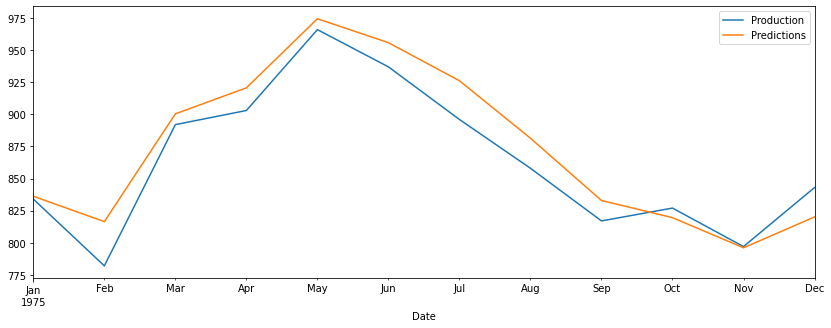

In [118]:
test.plot(figsize=(14,5))

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

18.915531895345204
